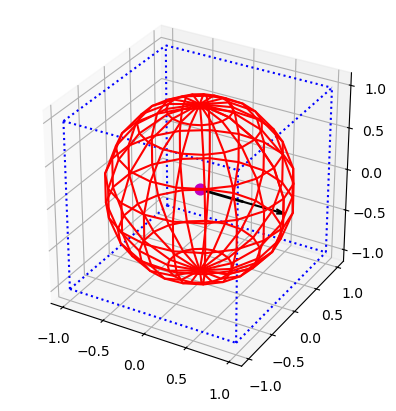

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
import mpl_toolkits.mplot3d.art3d as art3d


# Initialize figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio

# Draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s - e)) == r[1] - r[0]:
        ax.plot3D(*zip(s, e), color="b", ls=':')

# Draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

# Draw a point at the origin
ax.scatter([0], [0], [0], color="m", s=60)


# Function to draw a 3D arrow using Line3D and Quiver
def draw_3d_arrow(ax, start, end, color="k"):
    start, end = np.array(start), np.array(end)
    
    # Draw line (shaft of arrow)
    ax.plot3D(*zip(start, end), color=color, lw=2)

    # Arrowhead using quiver
    vec = end - start
    ax.quiver(*end, *vec, color=color, arrow_length_ratio=0.2)


# Draw a 3D arrow from (0,0,0) to (1,1,1)
draw_3d_arrow(ax, [0, 0, 0], [0.5, 0, 0], color="k")

# Show plot
plt.show()

